In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.font_manager as fm

import Customer_Def

개인별 구매 내역
오전/오후 가장 많이 구매한 구매내역

In [2]:
# 고객의 개인정보 파일
# 고객의 고유 식별번호 및 성별,나이,지역 분류

df_customer = pd.read_csv("./LPOINT_BIG_COMP_01_DEMO.csv")
df_customer = pd.DataFrame(df_customer)
# 고객 데모 정보(zon_lv = 거주지 분류 코드)
df_customer.rename(columns={'ma_fem_dv':'sex'},inplace=True)
# 컬럼명 변경
man = (df_customer['sex'] == '남성')
girl = (df_customer['sex'] == '여성')
#  남성/여성 조건 변수에 저장

age_20 = (df_customer['ages'] == '20대')
age_30 = (df_customer['ages'] == '30대')
age_40 = (df_customer['ages'] == '40대')
age_50 = (df_customer['ages'] == '50대')
# 연령대별 조건 변수에 저장

In [3]:
# 고객 정보 파일 생성


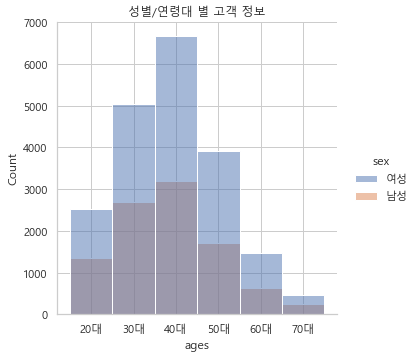

In [4]:
df_customer = df_customer.sort_values(by=['ages'])
# 연령대 별 정렬
plt.rcParams['font.family'] = "HangulGothic"
sns.set(font = "Malgun Gothic",rc={"axes.unicode_minus":False},style = 'whitegrid')
rcParams['figure.figsize'] = 15,8

p = sns.displot(data=df_customer,x='ages',hue='sex')
p.set(title="성별/연령대 별 고객 정보")

In [19]:
# 고객이 롯데 유통사의 온/오프라인 점포에서 구매한 상품에 대한 구매 내역 
# 고객의 고유 식별번호 / 장바구니(영수증) 식별 번호 / 온라인2 오프라인1 구분 / 제휴사 구분(A01~06:유통사) / 상품코드 / 구매점포 코드 / 구매일자 / 시간 / 금액 / 수량

# 온라인 상품 구매 정보 : 롯데 제휴사 온라인 채널에서 구매한 내역
# 오프라인 상품 구매 정보 : 오프라인 제휴사에서 구매한 내역
df_item = pd.read_csv("./LPOINT_BIG_COMP_02_PDDE.csv")
df_item = pd.DataFrame(df_item)
df_item.rename(columns={'rct_no': 'receipt','chnl_dv':"on/off",'br_c':'item','de_dt':'date','de_hr':'hour','buy_ct':'count'}, inplace=True)
df_item['on/off'] = df_item['on/off'].replace({1: 'off', 2: 'on'}, regex=True) # 온/오프라인 전처리
df_item.head()
# 유통사 상품 구매 내역(상품 구매 정보, rct_no = 유통사(A01~6)에서 고객이 구매한 상품의 데이터)
# df_item['pd_c'].value_counts().head(10)
# df_item['item'].value_counts() # item 중 가장 많이 구매한 제품은 'A020006' 

# 봄 : 3~5 / 여름 : 6~8 / 가을: 9~11 / 겨울 : 12~2 계절별 구매 추이
# 오프라인 기준 구매 시간 별 추이 (오프라인 -> 395만개 / 온라인 -> 42만개)
df_item

C:\Users\USER\AppData\Local\Temp\ipykernel_10808\1054788189.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_item = pd.read_csv("./LPOINT_BIG_COMP_02_PDDE.csv")


,cust,receipt,on/off,cop_c,item,pd_c,date,hour,buy_am,count
0,M430112881,A01000001113,off,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,off,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,off,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,off,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,off,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,on,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,on,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,on,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,on,A06,NaN,PD0507,20211231,23,50000.0,1


In [6]:
spr = ((df_item['date'] >= 20210301) & (df_item['date'] <= 20210531))
sum = ((df_item['date'] >= 20210601) & (df_item['date'] <= 20210831))
fall = ((df_item['date'] >= 20210901) & (df_item['date'] <= 20211130))
win = ((df_item['date'] >= 20211201) & (df_item['date'] <= 20210229))
# 계절 별 조건 변수 생성
# pd_c 를 대분류 카테고리로 변경 -> 카테고리 별 주문 내역

In [7]:
# 상품에 대한 분류 
# 상품 / 상품명 / 상품 대분류 / 상품 중분류
df_category = pd.read_csv("./LPOINT_BIG_COMP_04_PD_CLAC.csv")
df_category = pd.DataFrame(df_category)
# 유통사 상품 카테고리 마스터(상품 분류 정보)

In [8]:
new_array = []
for i in df_category['clac_hlv_nm'].unique():
    new_array.append(i)
    
clav_cnt = df_category['clac_hlv_nm'].nunique()
# 제품 별 대분류를 리스트로 저장

item_num = [{i:[]} for i in range(clav_cnt)]
a = 0
for i in item_num:
    i[new_array[a]] = i.pop(a)
    for k,v in i.items():
        df = df_category.loc[df_category['clac_hlv_nm'] == k]
        array = []
        for i in df['pd_c'].unique():
            array.append(i)
        v = v.extend(array)
    a+=1
# 상품 대분류 별 분류 [{ '대분류' : ['상품명'] } * 60개 ]
# 대분류에 속한 상품 카테고리를 그룹으로 묶는 변수 생성
df_category.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [9]:
# pd_c 를 대분류 카테고리로 선별하는 작업
def item_to_cat(data,item=item_num):
    for i in item:
        for k,v in i.items():
            if data in v:
                data = k
                return data
    else:
        return print('자료가 없습니다')

# df = []
# for i in df_item['pd_c'].unique():
#     df.append(i)

# for i in df:
#     df_item['pd_c'].replace(i,item_to_cat(df))
# print(df_item['pd_c'])
print(item_to_cat('PD1369'))

주방잡화


In [20]:
# 온/오프라인의 제휴사에서 구매한 상품을 카테고리 별로 분류
df_item['pd_c'] = df_item['pd_c'].apply(item_to_cat)
df_item

,cust,receipt,on/off,cop_c,item,pd_c,date,hour,buy_am,count
0,M430112881,A01000001113,off,A01,A010039,남성의류,20210101,10,15000.0,1
1,M646853852,A01000002265,off,A01,A010025,주방잡화,20210101,10,79700.0,1
2,M430112881,A01000003148,off,A01,A010039,남성의류,20210101,10,19000.0,1
3,M430112881,A01000003148,off,A01,A010039,남성의류,20210101,10,19000.0,1
4,M430112881,A01000004946,off,A01,A010039,남성의류,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,on,A06,NaN,상품권,20211231,23,50000.0,1
4381739,M533286446,E06052119978,on,A06,NaN,상품권,20211231,23,50000.0,1
4381740,M533286446,E06052119978,on,A06,NaN,상품권,20211231,23,50000.0,1
4381741,M533286446,E06052119978,on,A06,NaN,상품권,20211231,23,50000.0,1


In [11]:
# 고객의 롯데 제휴사의 점포에서 구매한 구매내역
# 고객 / 영수증 / 제휴사(B01:숙박업소,C01,02:엔터테이먼트,D01,02:F&B,E01:렌탈업종) / 점포 / 이용일자 / 방문일자 / 이용시간 / 금액

df_service = pd.read_csv("./LPOINT_BIG_COMP_03_COP_U.csv")
df_service = pd.DataFrame(df_service)
df_service.head()
# 제휴사 서비스 이용 내역(제휴사 이용 정보, rct_no = 유통 외 제휴사 이용 데이터로 제휴사에서 결제 이력 데이터)

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [12]:
# 유통사/제휴사 점포 마스터(점포 정보) 
# 점포 / 제휴사(A01~06 : 유통사,B01:숙박업소,C01,02:엔터테이먼트,D01,02:F&B,E01:렌탈업종) / 지역 대분류 / 지역 중분류

df_market = pd.read_csv("./LPOINT_BIG_COMP_05_BR.csv")
df_market = pd.DataFrame(df_market)
df_market.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
